In [1]:
final_df_08 = pd.read_csv("../final_df_08.csv")
final_movie_ols = final_df_08.drop("Unnamed: 0", axis=1)
#final_movie_ols.head()

In [205]:
final_movie_ols.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'aud_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre',
       'rate', 'type', 'expert_rating', 'starring_actors', 'running_times',
       'audience_rating', 'rating_audiences', 'realease_year',
       'director_power', 'director_movie_num', 'sequel', 'original',
       'actor_power'],
      dtype='object')

### Column describe

- title
- director
- distributor
- distributor_group
- releas_date
- releas_season
- release
- form
- nation
- screen
- rev_nationwild
- aud_nationwide : 전국관객수
- rev_seoul
- rev_seoul.1
- genre
- audience_ration
- rating_audiences
- release_year
- director_power : summation of aud_nationwide from last 3 years realsed movie who direct
- director_movie_num
- sequel : boolean(binomiel)
- original : boolean(binomiel)
- actor_power : summation of aud_nationwide from last 3 years realsed movie who star (as main actor)   

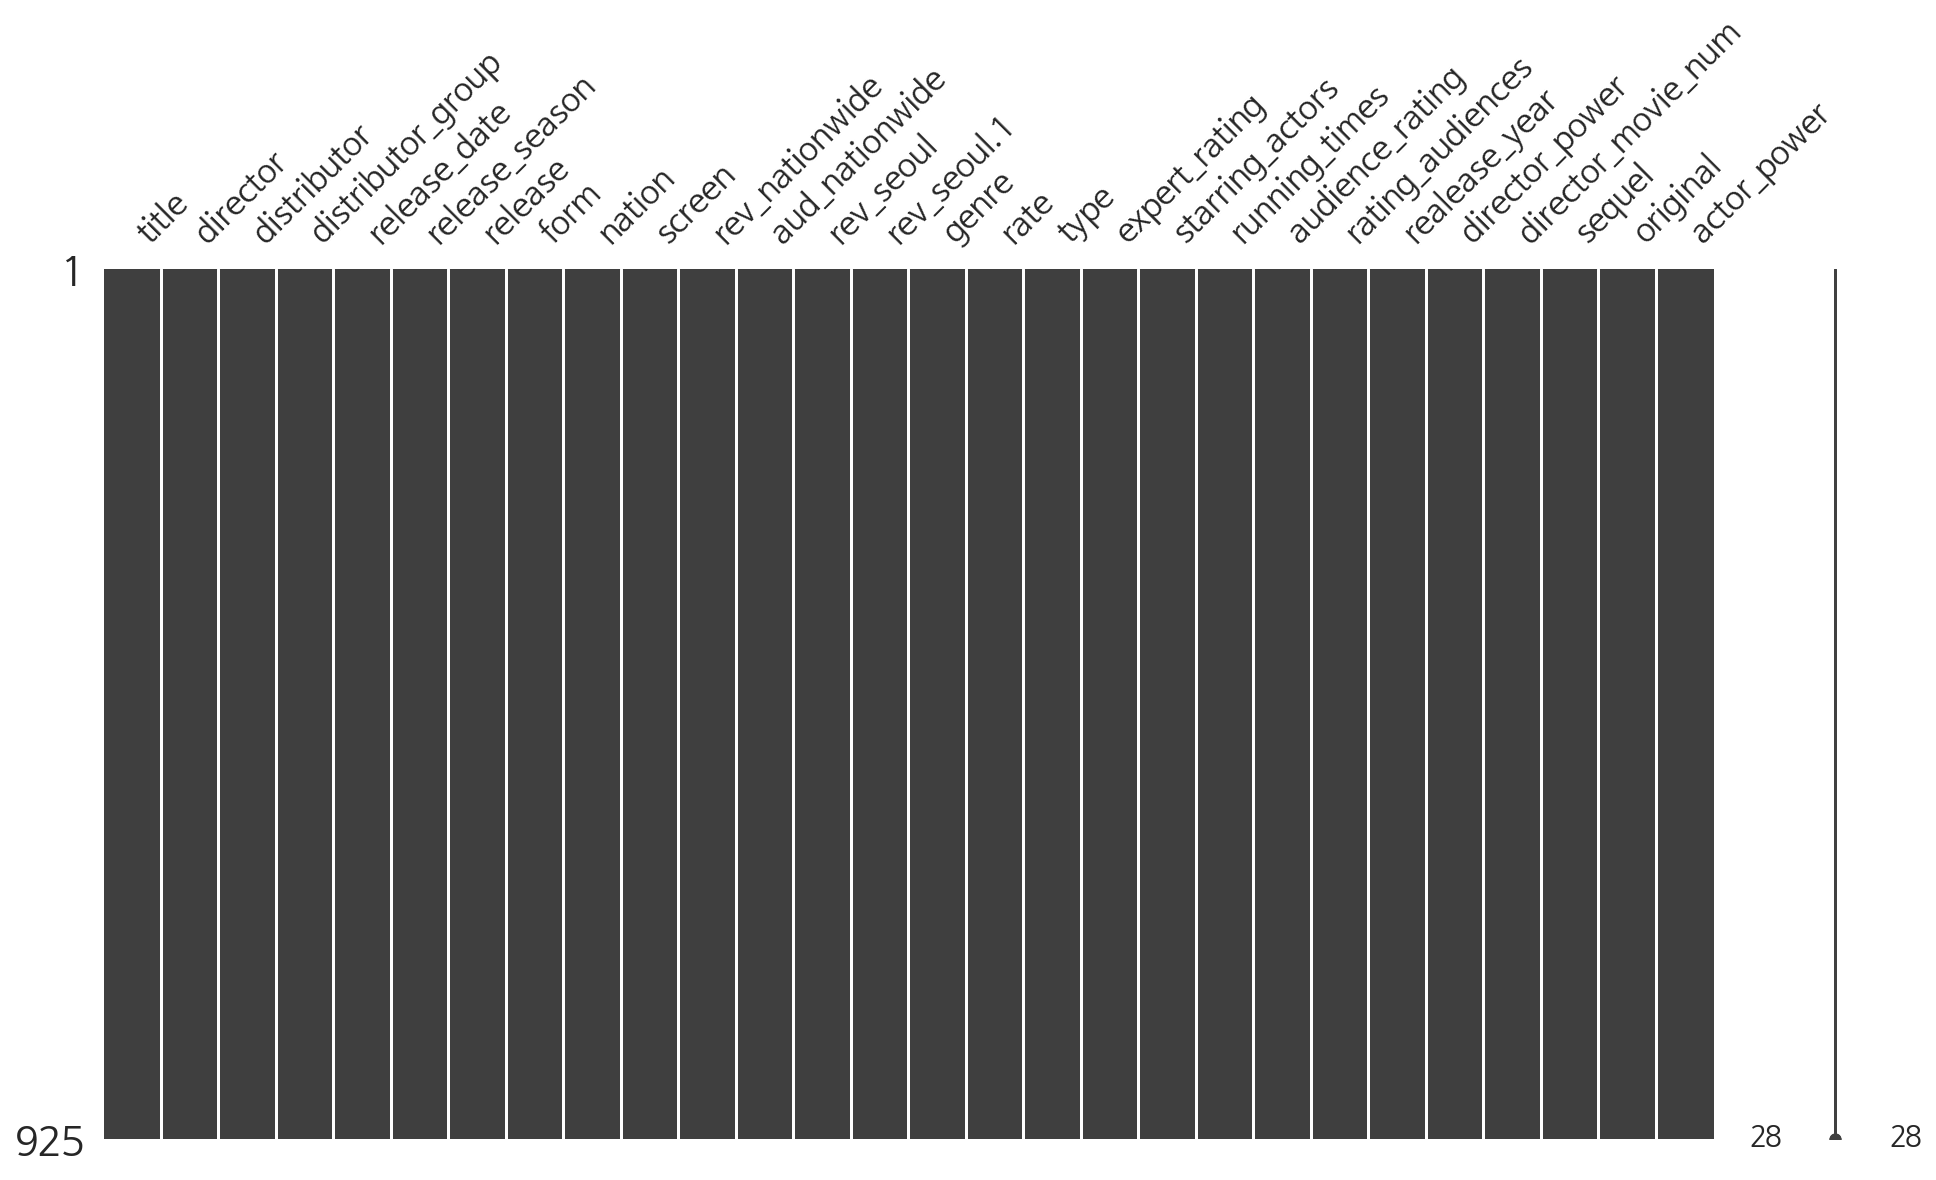

In [206]:
import missingno as msno

msno.matrix(final_movie_ols, figsize=(16, 8))
plt.show()

In [207]:
final_movie_ols.describe()

,screen,rev_nationwide,aud_nationwide,rev_seoul,rev_seoul.1,expert_rating,running_times,audience_rating,rating_audiences,realease_year,director_power,sequel,original,actor_power
count,925.000000,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,925.000000,925.000000,925.000000,925.000000,925.000000,9.250000e+02,925.000000,925.000000,9.250000e+02
mean,615.031351,8.986493e+09,1.099422e+06,2.420606e+09,2.839164e+05,5.400735,109.778378,8.166960,673.470270,2016.956757,3.755600e+06,0.454054,0.308108,8.945175e+07
std,419.167442,1.664960e+10,2.009962e+06,4.372609e+09,5.045390e+05,2.048343,19.932613,1.492485,1386.145334,1.436337,1.252446e+07,0.498154,0.461961,1.498437e+08
min,28.000000,2.519903e+08,3.186600e+04,3.015330e+07,4.068000e+03,0.000000,48.000000,0.000000,0.000000,2014.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,322.000000,7.617593e+08,9.701700e+04,2.454462e+08,3.006200e+04,5.000000,97.000000,7.867150,81.000000,2016.000000,1.502150e+05,0.000000,0.000000,4.066096e+06
50%,512.000000,2.246950e+09,2.860420e+05,6.281424e+08,7.632900e+04,5.920000,110.000000,8.457944,234.000000,2017.000000,8.145870e+05,0.000000,0.000000,2.987306e+07
75%,827.000000,8.881616e+09,1.124815e+06,2.286908e+09,2.748960e+05,6.700000,122.000000,8.919948,696.000000,2018.000000,3.417629e+06,1.000000,1.000000,1.003499e+08
max,2835.000000,1.396400e+11,1.626336e+07,3.346972e+10,3.638287e+06,9.110000,222.000000,10.000000,24610.000000,2019.000000,1.989550e+08,1.000000,1.000000,1.151033e+09


#### distributor_group 컬럼 살펴보기

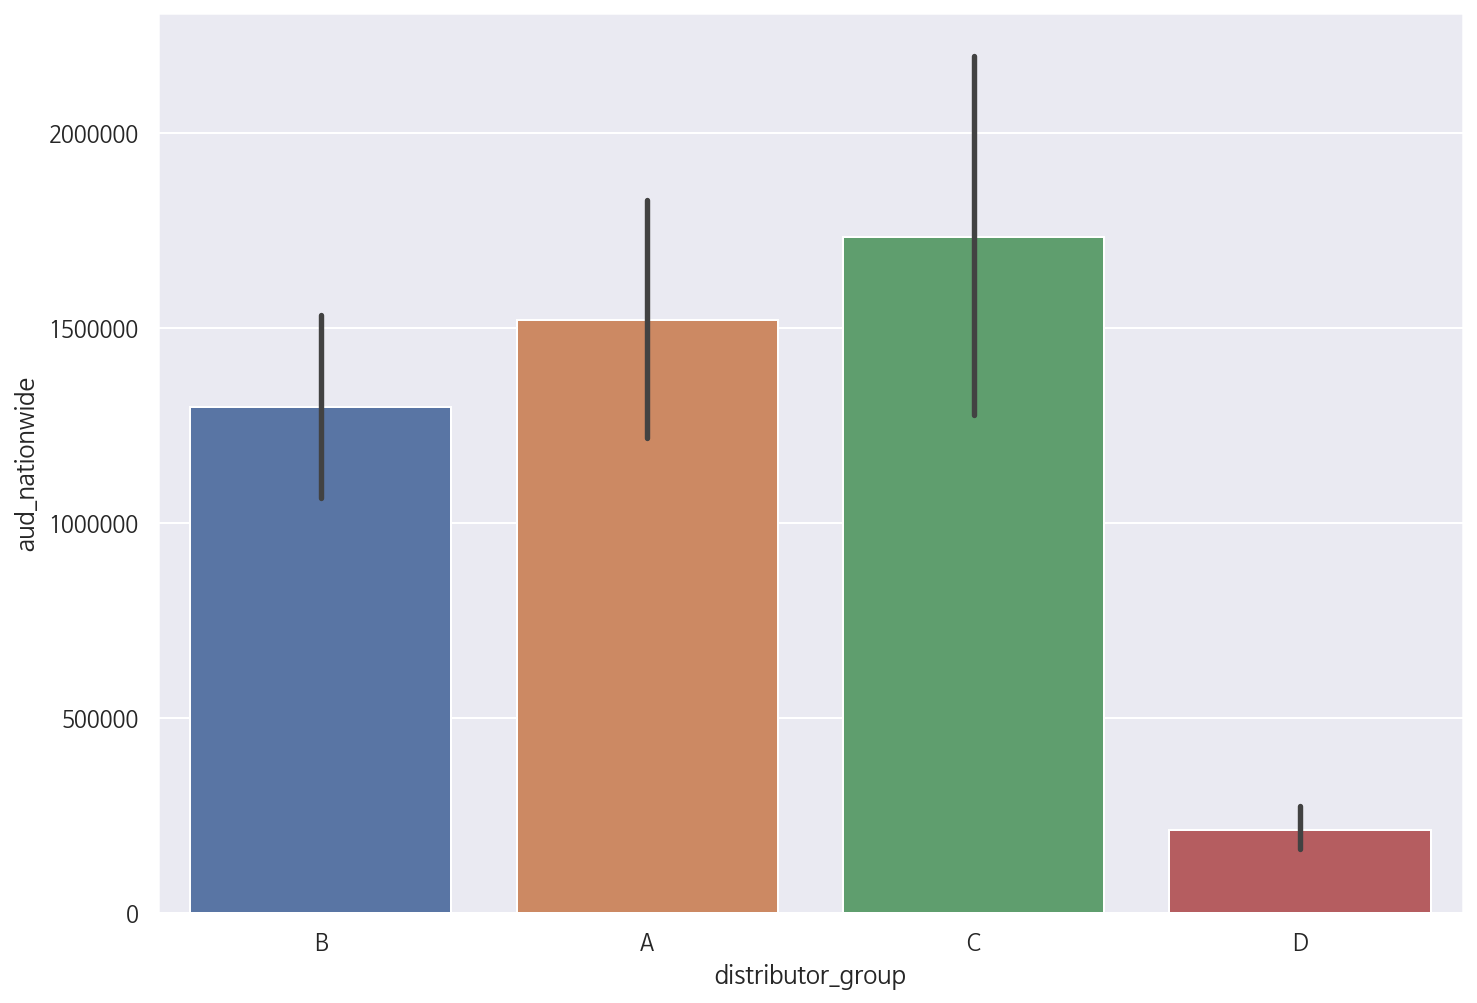

In [208]:
sns.barplot(x=final_movie_ols["distributor_group"], y=final_movie_ols["aud_nationwide"])

In [209]:
domestic_major = final_movie_ols[final_movie_ols['distributor_group'] == 'A']
hollywood = final_movie_ols[final_movie_ols['distributor_group'] == 'B']
domestic_minor = final_movie_ols[final_movie_ols['distributor_group'] == 'C']
domestic_indi = final_movie_ols[final_movie_ols['distributor_group'] == 'D']

In [106]:
domestic_major["distributor"].unique()

array(['씨제이이앤엠(주)', '메가박스중앙(주)플러스엠', 'CGV아트하우스', '롯데쇼핑㈜롯데엔터테인먼트',
       'CGV아트하우스,(주)대명문화공장', '롯데쇼핑㈜롯데엔터테인먼트,(주)마인스 엔터테인먼트',
       'CGV아트하우스,(주)리틀빅픽쳐스', 'CGV아트하우스,영화사 풀', '메가박스중앙(주)플러스엠,(주)키위미디어그룹',
       '롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스', '메가박스중앙(주)플러스엠,주식회사 키위컴퍼니',
       '씨제이 씨지브이(CJ CGV)(주)', '롯데컬처웍스(주)롯데엔터테인먼트',
       '롯데컬처웍스(주)롯데엔터테인먼트,씨네그루(주)키다리이엔티', '메가박스중앙(주)플러스엠,(주)콘텐츠 난다긴다',
       '씨제이이앤엠(주),(주)덱스터스튜디오'], dtype=object)

In [107]:
hollywood["distributor"].unique()

array(['월트디즈니컴퍼니코리아(주)', '이십세기폭스코리아(주)', '유니버설픽쳐스인터내셔널 코리아(유)',
       '워너브러더스 코리아(주)', '씨네그루(주)다우기술', '(주)이수C&E', '(주)티캐스트',
       '씨네그루(주)키다리이엔티', '월트디즈니컴퍼니코리아 유한책임회사', '소니픽쳐스엔터테인먼트코리아주식회사극장배급지점',
       '(주)이수C&E,(주)스톰픽쳐스코리아', '씨네그루(주)키다리이엔티,주식회사 키위컴퍼니',
       '(주)이수C&E,(주)에이원엔터테인먼트', '씨네그루(주)키다리이엔티,(주)삼백상회',
       '(주)이수C&E,(주)시너지미디어', '(주)셀트리온엔터테인먼트', '케이티하이텔(주)'], dtype=object)

In [108]:
domestic_minor['distributor'].unique()

array(['(주)쇼박스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스,(주)와우픽쳐스', '(주)아이코닉스',
       '(재)CBS,(주)영화사 안다미로', '(재)CBS', '(주)홈초이스', '(주)애니플러스',
       '(재)CBS,주식회사 마운틴픽쳐스', '(주)넥스트엔터테인먼트월드(NEW),(주)팬엔터테인먼트'],
      dtype=object)

In [101]:
len(domestic_indi['distributor'].unique())

97

- A(domestic_major) : 씨제이이엔엠, 메가박스중앙, CGV 아트하우스, 롯데 외 관련 합작사
- B(hollywood) : 월트디즈니, 이십세기폭스, 유니버설픽쳐스, 워너브러더스 코리아, 씨네그루, 이수C&E, 티캐스트, 소니픽쳐스, 스톰픽쳐코리아, 키위컴퍼니, 에이원엔터테이먼트, 셀트리온엔터테인먼트, (케이티하이텔_1건)
- C(domestic_minor) : 쇼박스, 넥스트엔터테인먼트(NEW), 아이코닉스, CBS, 홈초이스, 애니플러스, 마운틴픽쳐스
- D(domestic_indi) : 그 외 소규모 영화사

In [210]:
work_countA = len(final_movie_ols[final_movie_ols['distributor_group'] == 'A'])
work_countB = len(final_movie_ols[final_movie_ols['distributor_group'] == 'B'])
work_countC = len(final_movie_ols[final_movie_ols['distributor_group'] == 'C'])
work_countD = len(final_movie_ols[final_movie_ols['distributor_group'] == 'D'])

print(work_countA, work_countB, work_countC, work_countD)

228 328 110 259


In [211]:
avg_aud_bydistributorA = sum(domestic_major['aud_nationwide']) / len(domestic_major['distributor_group'])
avg_aud_bydistributorB = sum(hollywood['aud_nationwide']) / len(hollywood['distributor_group'])
avg_aud_bydistributorC = sum(domestic_minor['aud_nationwide']) / len(domestic_minor['distributor_group'])
avg_aud_bydistributorD = sum(domestic_indi['aud_nationwide']) / len(domestic_indi['distributor_group'])

print(avg_aud_bydistributorA, avg_aud_bydistributorB, avg_aud_bydistributorC, avg_aud_bydistributorD)

1519509.75 1295823.25 1732666.6454545455 211944.43243243243


- 배급사 등급별 평균 전국관객수: C(domestic_minor) > A(domestic_major > C(hollywood) D(domestic_indi) 

#### sequel, original 컬럼 살펴보기

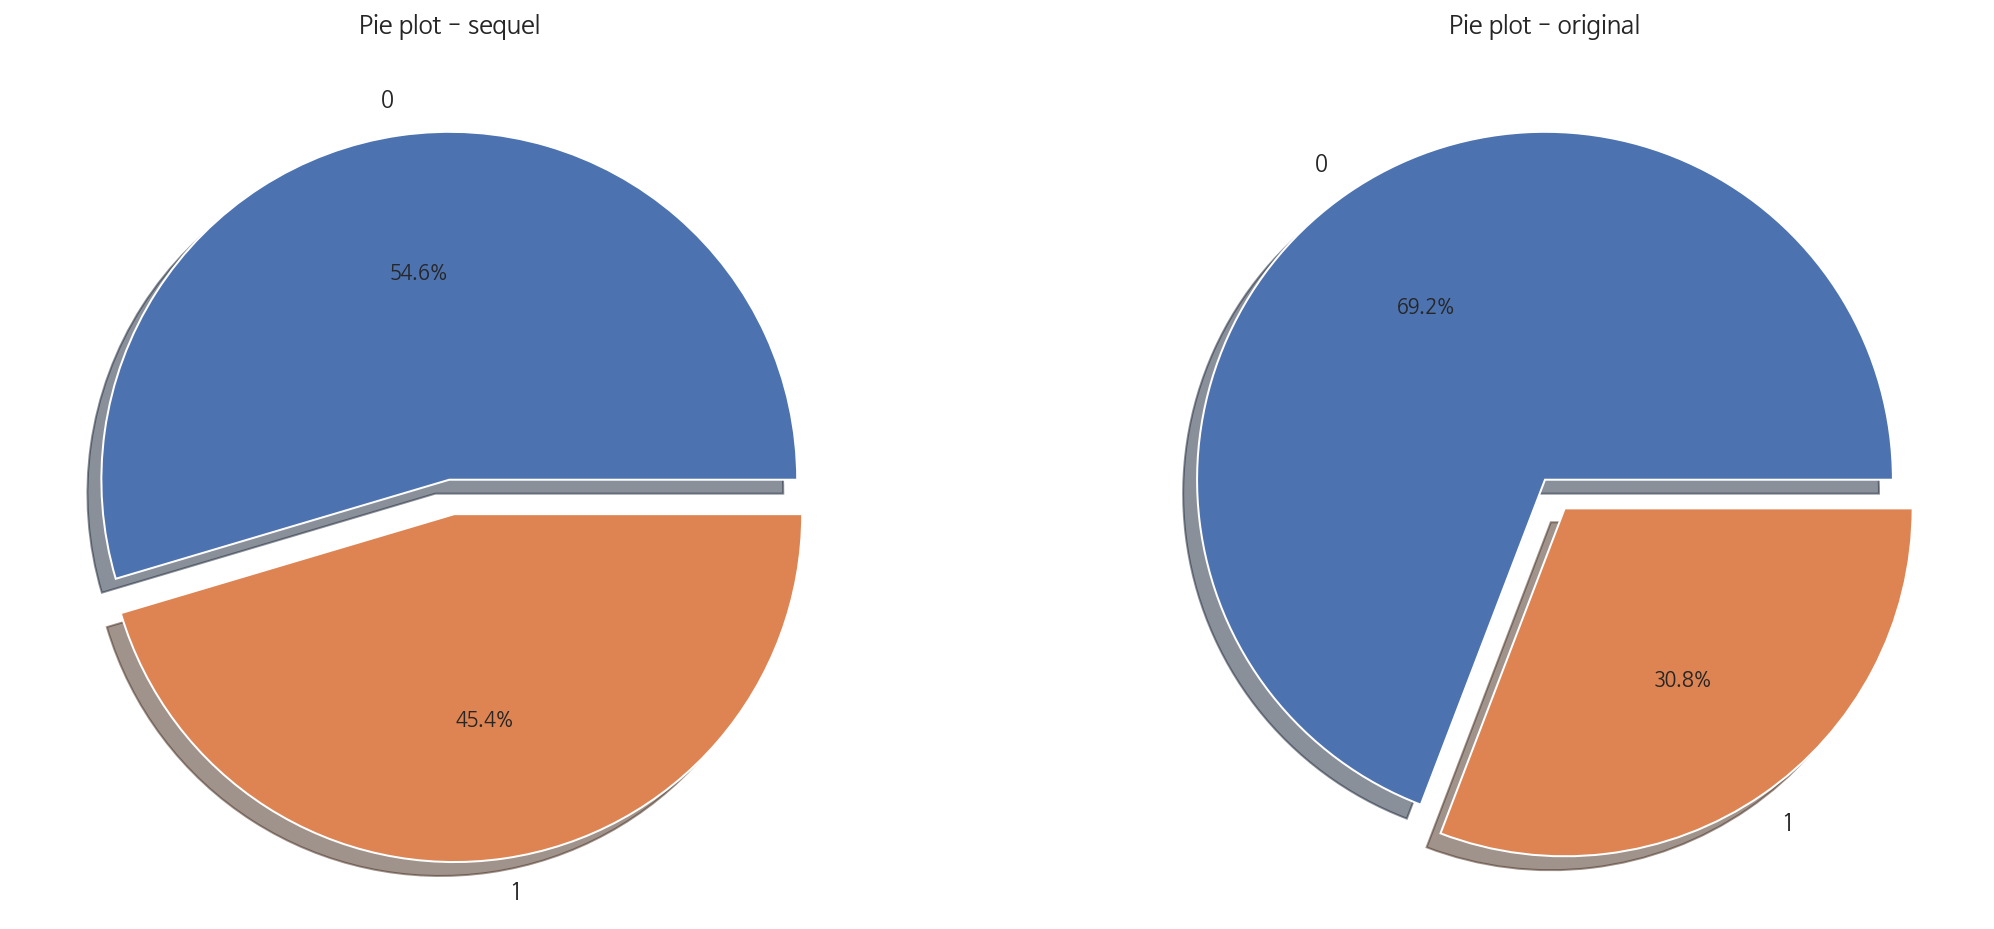

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

final_movie_ols['sequel'].value_counts().plot.pie(explode=[0, 0.1],
                                                  autopct='%1.1f%%', ax=ax[0], shadow=True)
final_movie_ols['original'].value_counts().plot.pie(explode=[0, 0.1],
                                                   autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[0].set_title('Pie plot - sequel')
ax[0].set_ylabel('')
ax[1].set_title('Pie plot - original')
ax[1].set_ylabel('')
plt.show()

- BoxOffice 100위 안에 들기 위해서는 original 보다는 sequel일 때 영향이 높음

#### nation 컬럼 살펴보기

In [220]:
from matplotlib import rc
import matplotlib as mpl

# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='Hancom Gothic')
# mpl.rc('axes', unicode_minus=False)

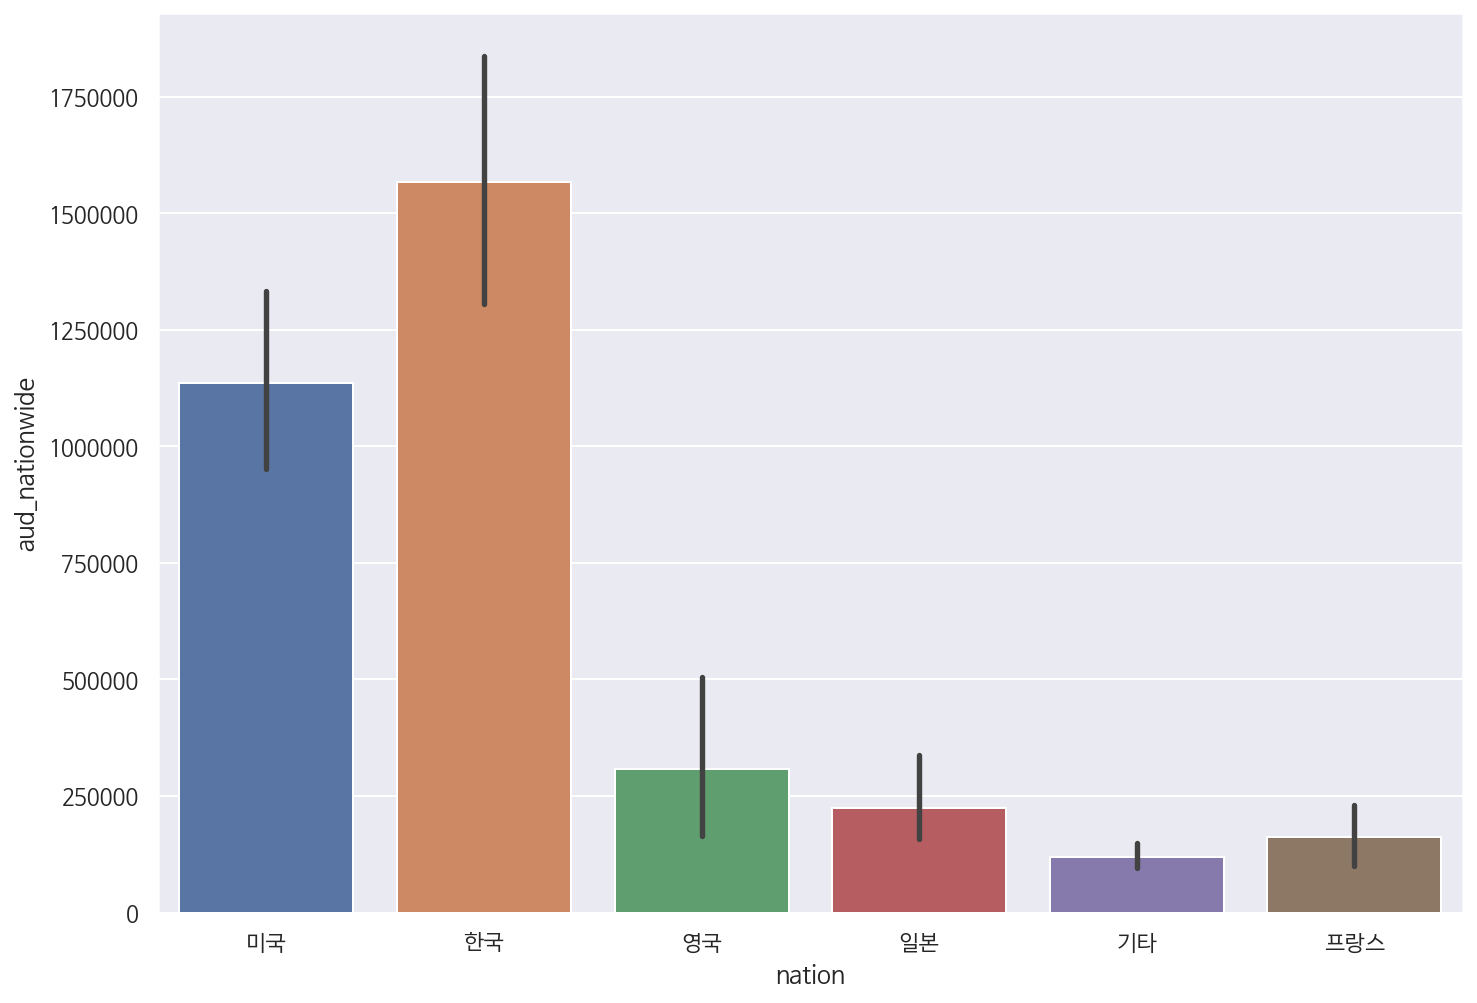

In [221]:
sns.barplot(x=final_movie_ols["nation"], y=final_movie_ols["aud_nationwide"])

#### genre 컬럼 살펴보기

In [218]:
from matplotlib import rc
import matplotlib as mpl


# plt.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='Hancom Gothic')
# mpl.rc('axes', unicode_minus=False)
sns.set(rc={'figure.figsize':(11.7, 8.27)})

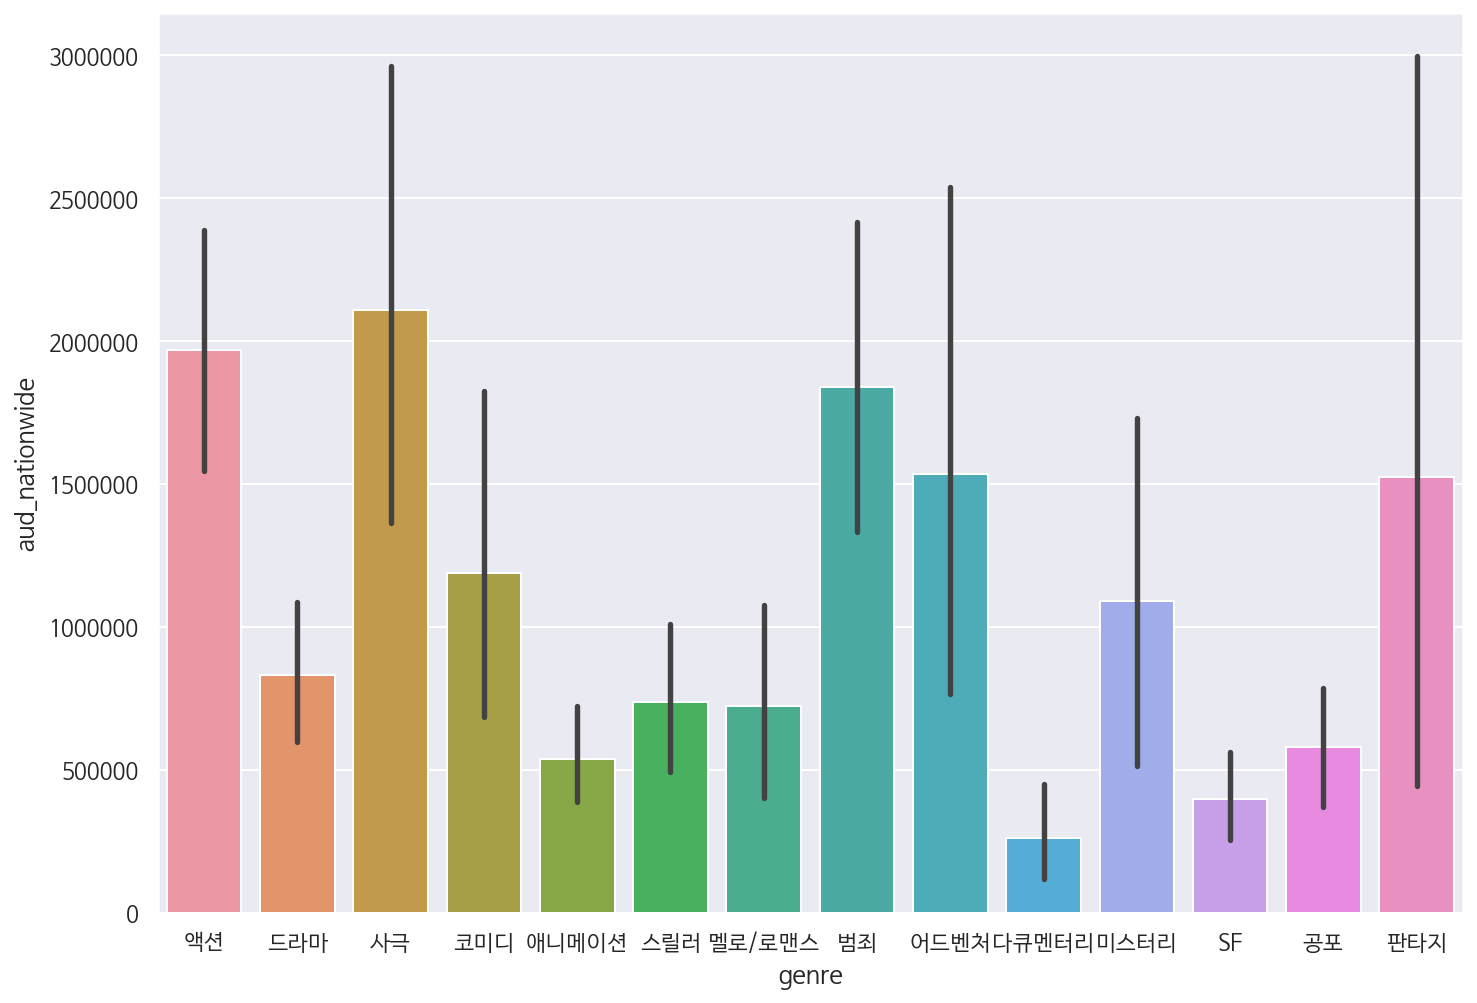

In [222]:
sns.barplot(x=final_movie_ols["genre"], y=final_movie_ols["aud_nationwide"])

### 선형회귀 분석 전 살펴보기

In [133]:
final_movie_ols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 28 columns):
title                 925 non-null object
director              925 non-null object
distributor           925 non-null object
distributor_group     925 non-null object
release_date          925 non-null object
release_season        925 non-null object
release               925 non-null object
form                  925 non-null object
nation                925 non-null object
screen                925 non-null int64
rev_nationwide        925 non-null float64
aud_nationwide        925 non-null int64
rev_seoul             925 non-null int64
rev_seoul.1           925 non-null int64
genre                 925 non-null object
rate                  925 non-null object
type                  925 non-null object
expert_rating         925 non-null float64
starring_actors       925 non-null object
running_times         925 non-null int64
audience_rating       925 non-null float64
rating_audience

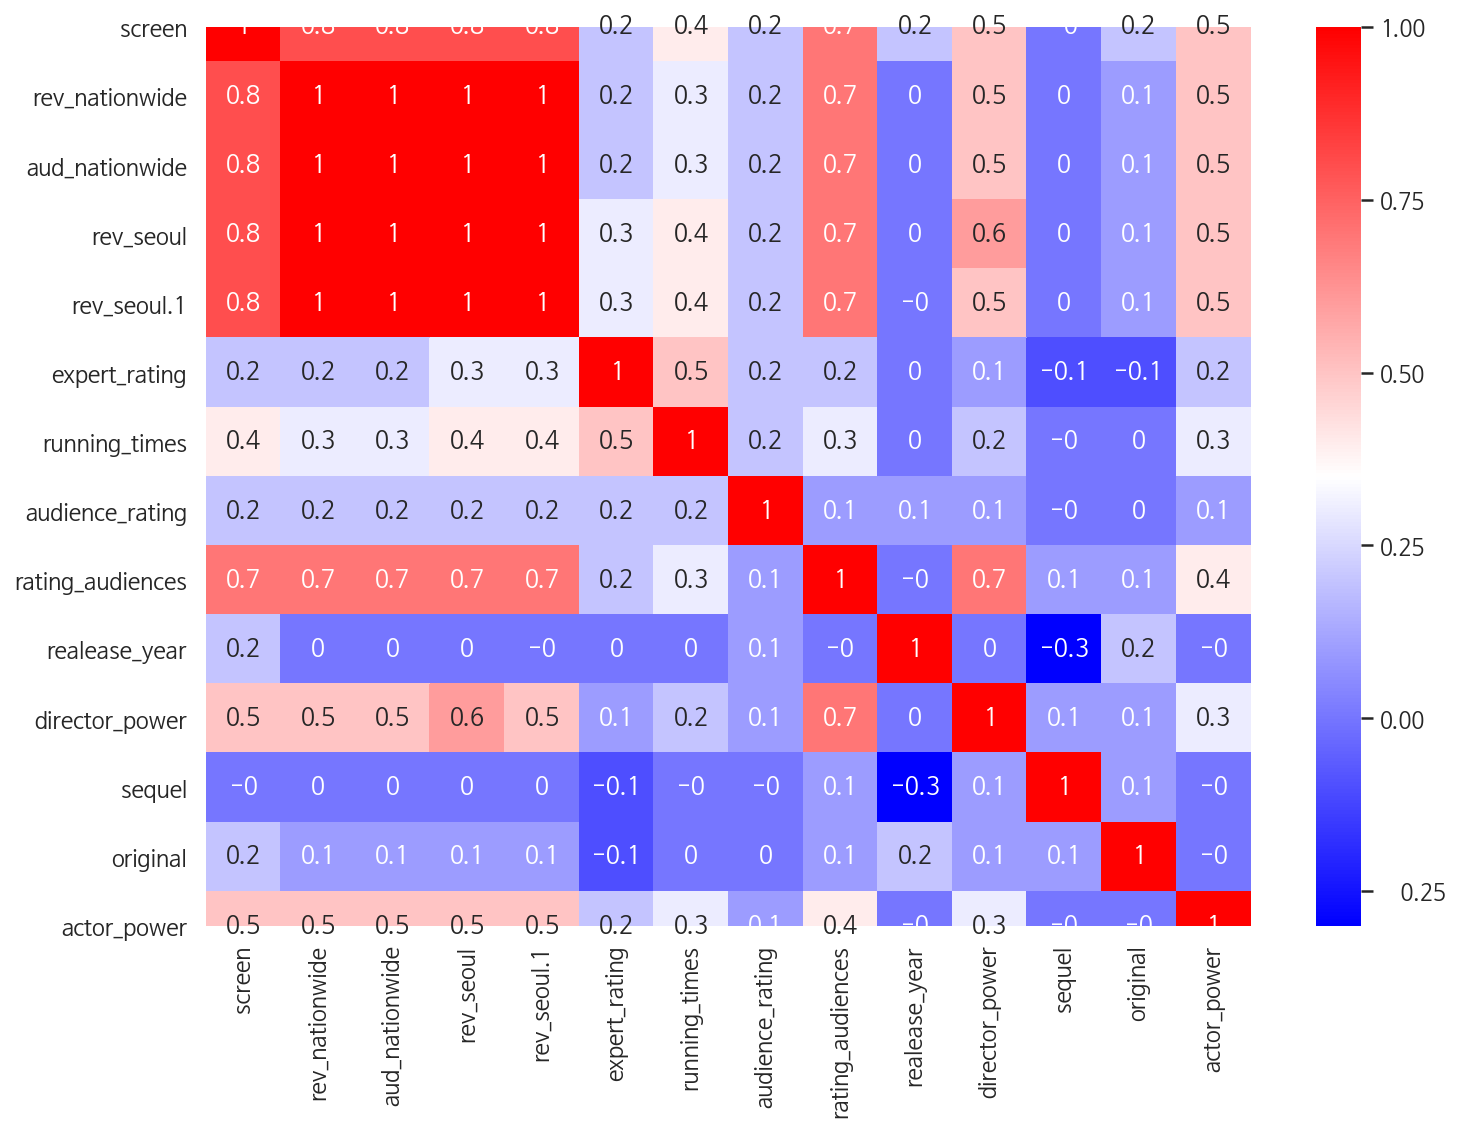

In [137]:
correlation_matrix = final_movie_ols.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

In [223]:
X_train = pd.read_csv("../X_train_08_1.csv")
y_train = pd.read_csv("../y_train_08_1.csv")
X_test = pd.read_csv("../X_test_08_1.csv")
y_test = pd.read_csv("../y_test_08_1.csv")

In [224]:
X_train = X_train.drop("Unnamed: 0", axis=1)
X_test = X_test.drop("Unnamed: 0", axis=1)
y_train = y_train.drop("Unnamed: 0", axis=1)
y_test = y_test.drop("Unnamed: 0", axis=1)

In [226]:
X_train.columns

Index(['title', 'director', 'distributor', 'distributor_group', 'release_date',
       'release_season', 'release', 'form', 'nation', 'screen',
       'rev_nationwide', 'rev_seoul', 'rev_seoul.1', 'genre', 'rate', 'type',
       'expert_rating', 'starring_actors', 'running_times', 'audience_rating',
       'rating_audiences', 'realease_year', 'director_power',
       'director_movie_num', 'sequel', 'original', 'actor_power'],
      dtype='object')

In [227]:
import statsmodels.api as sm

### OLS

#### model0

In [234]:
model0 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + 0", data=X_train)
result0 = model0.fit()
print(result0.summary())

                                 OLS Regression Results                                
Dep. Variable:                y_train   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              392.9
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                   3.50e-243
Time:                        00:41:27   Log-Likelihood:                         -11317.
No. Observations:                 740   AIC:                                  2.265e+04
Df Residuals:                     733   BIC:                                  2.268e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [235]:
result0.params

screen               2341.769429
expert_rating       42210.146385
running_times       -9782.794746
audience_rating        91.078907
rating_audiences      461.136004
director_power          0.006865
actor_power             0.002298
dtype: float64

#### model0_Test : overfitting

In [236]:
pred0 =  result0.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power"]])
rss = ((y_test.aud_nationwide - pred0) ** 2).sum()
tss = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared = 1 - rss/tss
rsquared

0.6871643201709314

Text(0.5, 1.0, 'aud_nationwide vs. Predicted_aud_nationwide')

C:\Users\shine\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\shine\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


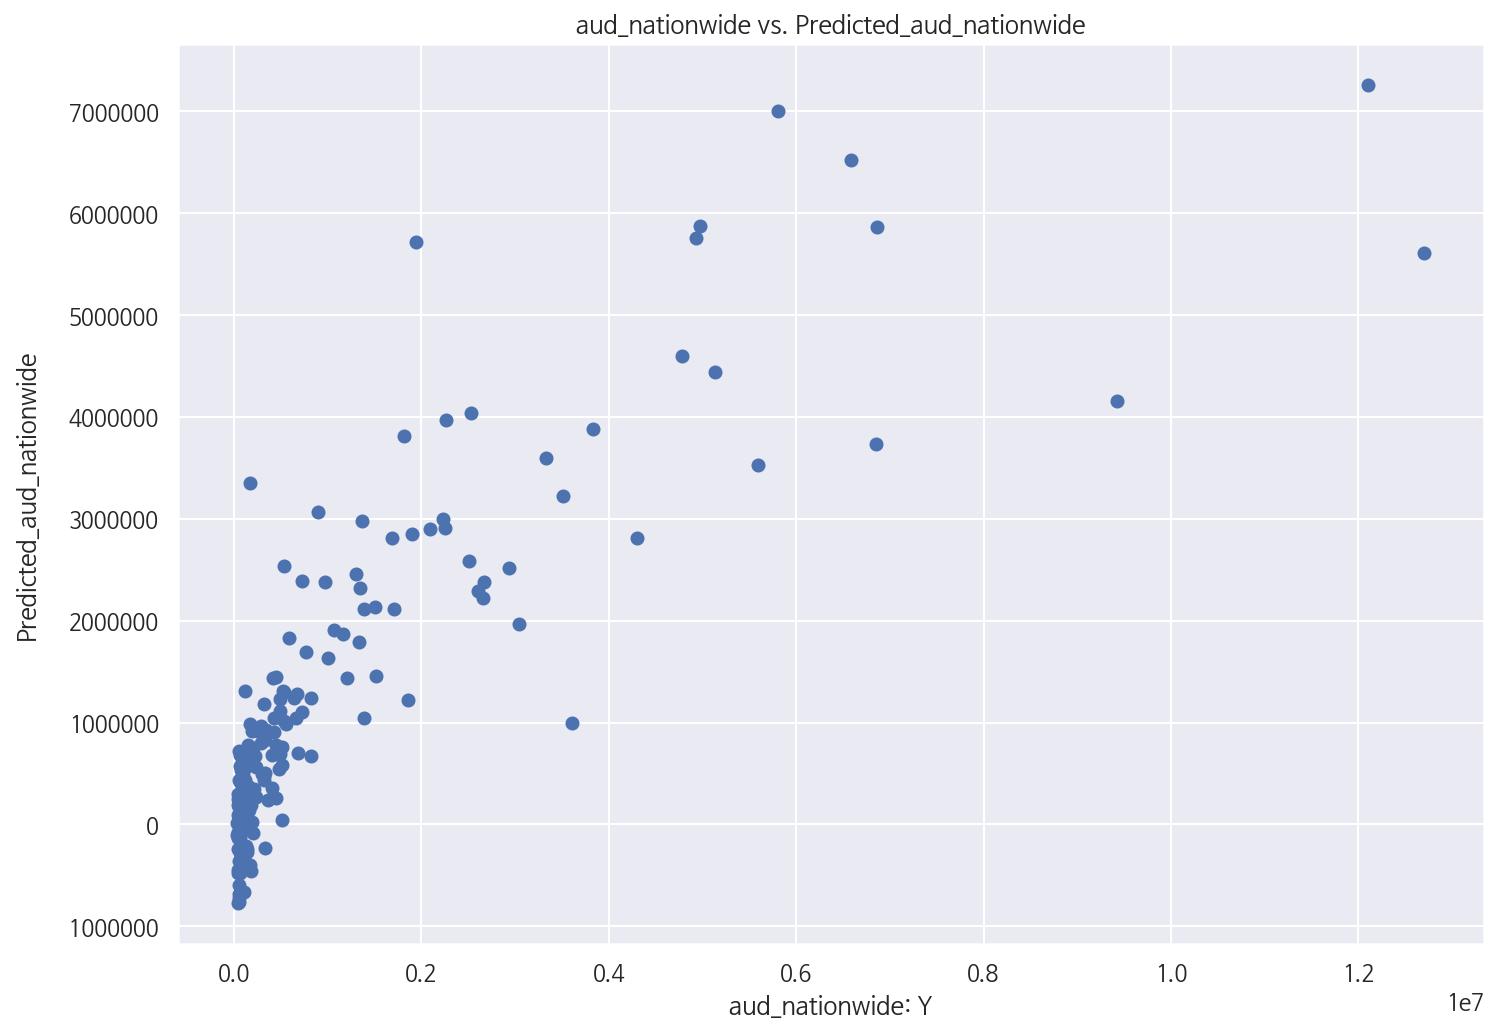

In [237]:

y_pred_test0 = result0.predict(X_test)

plt.scatter(y_test, y_pred_test0)
plt.xlabel("aud_nationwide: Y")
plt.ylabel("Predicted_aud_nationwide")
plt.title("aud_nationwide vs. Predicted_aud_nationwide")

In [240]:
from sklearn.metrics import mean_squared_error as mse

In [241]:
mse = mse(y_test, y_pred_test0)
print(mse)

1176780786336.5618


#### model1 : rate 예측에 마이너스 영향

In [242]:
model1 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(rate)", data=X_train)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     198.9
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.09e-200
Time:                        00:42:58   Log-Likelihood:                -11309.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     729   BIC:                         2.269e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.313e+06   3

In [248]:
pred1 =  result1.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "rate"]])
rss = ((y_test.aud_nationwide - pred1) ** 2).sum()
tss = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared = 1 - rss/tss
rsquared

0.6825923590668053

#### model2

In [249]:
model2 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre)", data=X_train)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     101.2
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          2.00e-193
Time:                        00:47:09   Log-Likelihood:                -11300.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     719   BIC:                         2.274e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.549e+06   4.34

In [250]:
pred2 =  result2.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre"]])
rss = ((y_test.aud_nationwide - pred2) ** 2).sum()
tss = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared = 1 - rss/tss
rsquared

0.6874924820928625

Text(0.5, 1.0, 'aud_nationwide vs. Predicted_aud_nationwide')

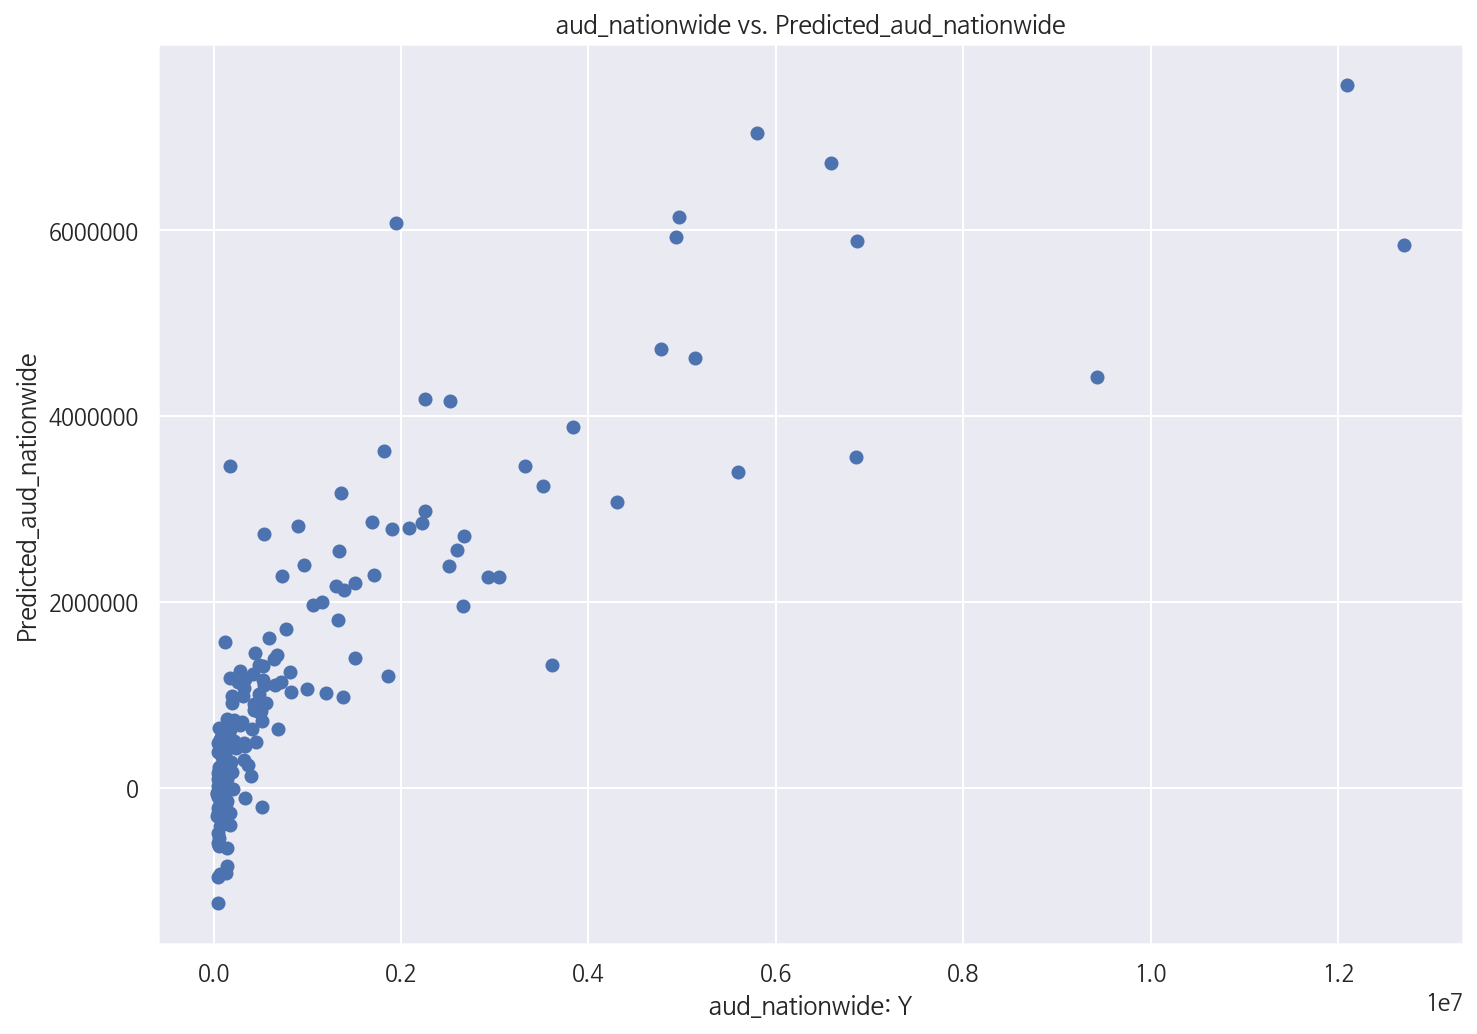

In [252]:

y_pred_test2 = result2.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre"]])

plt.scatter(y_test, y_pred_test2)
plt.xlabel("aud_nationwide: Y")
plt.ylabel("Predicted_aud_nationwide")
plt.title("aud_nationwide vs. Predicted_aud_nationwide")

In [254]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(y_test, y_pred_test2)
print(mse)

1175546353471.5293


#### model3

In [255]:
model3 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre) + C(nation)", data=X_train)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     82.15
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          5.72e-191
Time:                        00:51:52   Log-Likelihood:                -11294.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     714   BIC:                         2.276e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.173e+06   4.58

In [256]:
pred3 =  result3.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation"]])
rss = ((y_test.aud_nationwide - pred3) ** 2).sum()
tss = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared = 1 - rss/tss
rsquared

0.6881464180826496

#### model4 : overfitting

In [258]:
model4 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre) + C(nation) + C(distributor_group)", data=X_train)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     74.38
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          3.53e-190
Time:                        00:56:20   Log-Likelihood:                -11289.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     711   BIC:                         2.277e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [260]:
pred4 =  result4.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "distributor_group"]])
rss = ((y_test.aud_nationwide - pred4) ** 2).sum()
tss = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared = 1 - rss/tss
rsquared

0.6814641998612958

#### model5 : sequel 여부는 예측에 마이너스, original 여부가 예측에 플러스 요소!

In [273]:
model5 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre) + C(nation) + C(original)", data=X_train)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     79.92
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.67e-191
Time:                        01:03:49   Log-Likelihood:                -11291.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     713   BIC:                         2.276e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.193e+06   4.56

In [274]:
pred5 =  result5.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "distributor_group", "original"]])
rss = ((y_test.aud_nationwide - pred5) ** 2).sum()
tss = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared = 1 - rss/tss
rsquared

0.6961527279644137

#### model6 : overfitting

In [277]:
model6 = sm.OLS.from_formula(
    "y_train ~ screen + expert_rating + running_times + audience_rating + rating_audiences + director_power + actor_power + C(genre) + C(nation) + C(original) + C(release_season)", data=X_train)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     71.97
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.22e-189
Time:                        01:09:29   Log-Likelihood:                -11288.
No. Observations:                 740   AIC:                         2.264e+04
Df Residuals:                     710   BIC:                         2.278e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [278]:
pred6 =  result6.predict(X_test[["screen", "expert_rating", "running_times", 
                              "audience_rating", "rating_audiences", "director_power",
                              "actor_power", "genre", "nation", "distributor_group", "original", "release_season"]])
rss = ((y_test.aud_nationwide - pred6) ** 2).sum()
tss = ((y_test.aud_nationwide - y_test.aud_nationwide.mean()) ** 2).sum()

rsquared = 1 - rss/tss
rsquared

0.695750718220844

### Tobe : train - k-folds validation - test r-squared